In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from wordcloud import WordCloud

In [39]:
df = pd.read_csv("Hostel.csv")
df.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [40]:
df.columns

Index(['Unnamed: 0', 'hostel.name', 'City', 'price.from', 'Distance',
       'summary.score', 'rating.band', 'atmosphere', 'cleanliness',
       'facilities', 'location.y', 'security', 'staff', 'valueformoney', 'lon',
       'lat'],
      dtype='object')

In [41]:
df.columns = ["Index","Hostel Name", "City", "Min. Price for One Night (yen)", 
              "Distance from City Center", "Summary Score", "Rating", "Atmosphere", 
              "Cleaniness", "Facilities", "Location", "Security", "Staff", 
              "Value for Money", "Longitude", "Latitude"]
df.head()

,Index,Hostel Name,City,Min. Price for One Night (yen),Distance from City Center,Summary Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value for Money,Longitude,Latitude
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [42]:
df.drop(['Index'],axis=1,inplace=True)
df.head()

,Hostel Name,City,Min. Price for One Night (yen),Distance from City Center,Summary Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value for Money,Longitude,Latitude
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [43]:
df.shape

(342, 15)

In [44]:
df.dtypes

Hostel Name                        object
City                               object
Min. Price for One Night (yen)      int64
Distance from City Center          object
Summary Score                     float64
Rating                             object
Atmosphere                        float64
Cleaniness                        float64
Facilities                        float64
Location                          float64
Security                          float64
Staff                             float64
Value for Money                   float64
Longitude                         float64
Latitude                          float64
dtype: object

In [45]:
df.isnull().sum()

Hostel Name                        0
City                               0
Min. Price for One Night (yen)     0
Distance from City Center          0
Summary Score                     15
Rating                            15
Atmosphere                        15
Cleaniness                        15
Facilities                        15
Location                          15
Security                          15
Staff                             15
Value for Money                   15
Longitude                         44
Latitude                          44
dtype: int64

In [46]:
# Remove null values
df.fillna(method='ffill',inplace=True)
df.isnull().sum()

Hostel Name                       0
City                              0
Min. Price for One Night (yen)    0
Distance from City Center         0
Summary Score                     0
Rating                            0
Atmosphere                        0
Cleaniness                        0
Facilities                        0
Location                          0
Security                          0
Staff                             0
Value for Money                   0
Longitude                         0
Latitude                          0
dtype: int64

In [47]:
# Find unique City names
df['City'].value_counts()

Tokyo           127
Osaka           104
Kyoto            78
Fukuoka-City     19
Hiroshima        14
Name: City, dtype: int64

In [48]:
# Find unique Ratings
df['Rating'].value_counts()

Superb       196
Fabulous     107
Very Good     20
Good          11
Rating         8
Name: Rating, dtype: int64

In [49]:
#Q1) Find no of hostels per city
df1 = df.groupby('City')['Hostel Name'].count()
print(type(df1))
df1

<class 'pandas.core.series.Series'>


City
Fukuoka-City     19
Hiroshima        14
Kyoto            78
Osaka           104
Tokyo           127
Name: Hostel Name, dtype: int64

In [50]:
df1 = df1.reset_index()
print(type(df1))
df1

<class 'pandas.core.frame.DataFrame'>


,City,Hostel Name
0,Fukuoka-City,19
1,Hiroshima,14
2,Kyoto,78
3,Osaka,104
4,Tokyo,127


In [51]:
#Q2) Plot a bar chart depicting no of Hostels per city

In [52]:
l1 = list(df.groupby('City')['Hostel Name'].count().index)
l2 = list(df.groupby('City')['Hostel Name'].count().values)
print(l1)
print(l2)

['Fukuoka-City', 'Hiroshima', 'Kyoto', 'Osaka', 'Tokyo']
[19, 14, 78, 104, 127]


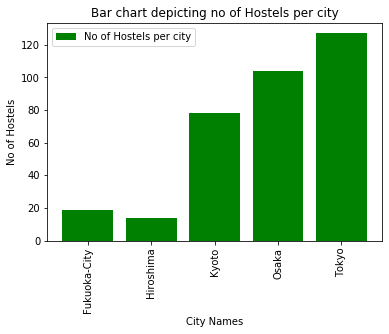

In [53]:
plt.bar(l1,l2,label='No of Hostels per city',color='g')
plt.title('Bar chart depicting no of Hostels per city')
plt.legend()
plt.xlabel('City Names')
plt.ylabel('No of Hostels')
plt.xticks(rotation=90)
# plt.savefig('Hostels_per_city.jpg')
plt.show()

In [54]:
# Create bar chart for hostel count by city
# city_bar = city_group.plot.bar(x="City", y="Hostel Count", rot=90, 
#                                legend=None, color="teal", zorder=3)
# plt.grid(which="major", axis="y", zorder=0)
# plt.xticks(rotation=45)
# plt.title("Hostel Count by City in Japan")
# plt.ylabel("No of Hostels")
# plt.savefig("hostel_bar.png")
# plt.show()

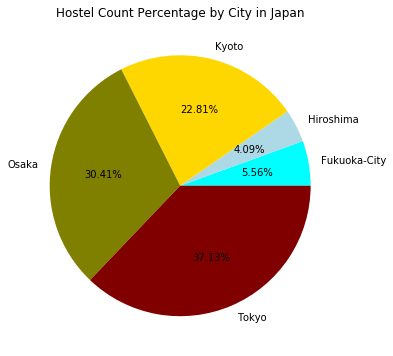

In [55]:
# Q3) Create pie chart for hostel count by city
colors = ["aqua", "lightblue", "gold", "olive", "maroon"]
plt.figure(figsize=(8,6))
plt.pie(df1['Hostel Name'], labels=df1["City"], colors=colors, autopct="%.2f%%")
plt.title("Hostel Count Percentage by City in Japan")
# plt.savefig("hostel_pie.png")
plt.show()

In [56]:
#Q4) Obtain numeric value from distance column
df["Distance magnitue (km)"] = df["Distance from City Center"].str.split("km").str[0]
df.head()

,Hostel Name,City,Min. Price for One Night (yen),Distance from City Center,Summary Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value for Money,Longitude,Latitude,Distance magnitue (km)
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678,2.9
1,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,135.513767,34.682678,0.7
2,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,7.8
3,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,8.7
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,10.5


In [57]:
# Drop redundant column
df = df.drop(["Distance from City Center"], axis=1)
df.head()

,Hostel Name,City,Min. Price for One Night (yen),Summary Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value for Money,Longitude,Latitude,Distance magnitue (km)
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678,2.9
1,& And Hostel,Fukuoka-City,2600,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,135.513767,34.682678,0.7
2,&And Hostel Akihabara,Tokyo,3600,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,7.8
3,&And Hostel Ueno,Tokyo,2600,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,8.7
4,&And Hostel-Asakusa North-,Tokyo,1500,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,10.5


In [58]:
# Q5) Find  min and max for minimum price column per city
df_min_price = df.groupby(["City"])["Min. Price for One Night (yen)"].min()
df_max_price = df.groupby(["City"])["Min. Price for One Night (yen)"].max()
print(f'Minimum price is')
df_min_price

Minimum price is


City
Fukuoka-City    2300
Hiroshima       2000
Kyoto           1000
Osaka           1200
Tokyo           1300
Name: Min. Price for One Night (yen), dtype: int64

In [59]:
print(f'Maximum price is')
df_max_price

Maximum price is


City
Fukuoka-City       4300
Hiroshima          3400
Kyoto              4000
Osaka           1003200
Tokyo           1003200
Name: Min. Price for One Night (yen), dtype: int64

In [60]:
# Q6) Find value count for each unique value for minimum price column
df.groupby(["Min. Price for One Night (yen)"])["City"].count()

Min. Price for One Night (yen)
1000        1
1200        5
1300        5
1400        3
1500       21
1600        9
1700        2
1800       13
1900       11
2000       39
2100        8
2200       15
2300       18
2400       10
2500       45
2600       14
2700       14
2800       12
2900       13
3000       23
3100        2
3200        6
3300       10
3400        4
3500        6
3600        4
3700        2
3800        6
3900        2
4000        5
4100        2
4200        1
4300        1
5200        1
5400        1
5500        1
6000        1
6200        1
6300        1
6500        1
7600        1
1003200     2
Name: City, dtype: int64

In [61]:
# Q7) Remove outlier
price_reduced = df[df["Min. Price for One Night (yen)"] < 8000]
df5 = price_reduced.groupby(["Min. Price for One Night (yen)"]).count()["City"]
df5

Min. Price for One Night (yen)
1000     1
1200     5
1300     5
1400     3
1500    21
1600     9
1700     2
1800    13
1900    11
2000    39
2100     8
2200    15
2300    18
2400    10
2500    45
2600    14
2700    14
2800    12
2900    13
3000    23
3100     2
3200     6
3300    10
3400     4
3500     6
3600     4
3700     2
3800     6
3900     2
4000     5
4100     2
4200     1
4300     1
5200     1
5400     1
5500     1
6000     1
6200     1
6300     1
6500     1
7600     1
Name: City, dtype: int64

In [62]:
price_reduced.head()

,Hostel Name,City,Min. Price for One Night (yen),Summary Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value for Money,Longitude,Latitude,Distance magnitue (km)
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678,2.9
1,& And Hostel,Fukuoka-City,2600,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,135.513767,34.682678,0.7
2,&And Hostel Akihabara,Tokyo,3600,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,7.8
3,&And Hostel Ueno,Tokyo,2600,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,8.7
4,&And Hostel-Asakusa North-,Tokyo,1500,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,10.5


In [63]:
price_reduced.columns

Index(['Hostel Name', 'City', 'Min. Price for One Night (yen)',
       'Summary Score', 'Rating', 'Atmosphere', 'Cleaniness', 'Facilities',
       'Location', 'Security', 'Staff', 'Value for Money', 'Longitude',
       'Latitude', 'Distance magnitue (km)'],
      dtype='object')

In [64]:
price_reduced.dtypes

Hostel Name                        object
City                               object
Min. Price for One Night (yen)      int64
Summary Score                     float64
Rating                             object
Atmosphere                        float64
Cleaniness                        float64
Facilities                        float64
Location                          float64
Security                          float64
Staff                             float64
Value for Money                   float64
Longitude                         float64
Latitude                          float64
Distance magnitue (km)             object
dtype: object

In [65]:
# Convert 'Distance magnitue (km)' to numeric
price_reduced['Distance magnitue (km)'] = price_reduced['Distance magnitue (km)'].apply(pd.to_numeric)
price_reduced.dtypes

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Hostel Name                        object
City                               object
Min. Price for One Night (yen)      int64
Summary Score                     float64
Rating                             object
Atmosphere                        float64
Cleaniness                        float64
Facilities                        float64
Location                          float64
Security                          float64
Staff                             float64
Value for Money                   float64
Longitude                         float64
Latitude                          float64
Distance magnitue (km)            float64
dtype: object

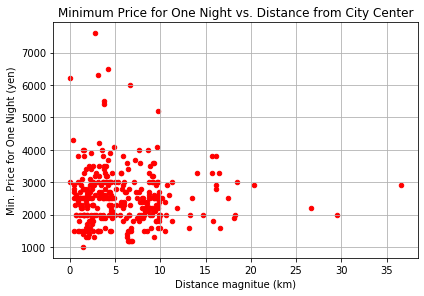

In [66]:
# Q8) Depict Distance (km) vs Min Price per night on scatter plot

# Method 1 - using df.plot.scatter()
price_reduced.plot.scatter("Distance magnitue (km)", 
                           "Min. Price for One Night (yen)",color='red')
plt.tight_layout()
plt.title("Minimum Price for One Night vs. Distance from City Center")
plt.grid()
plt.show()

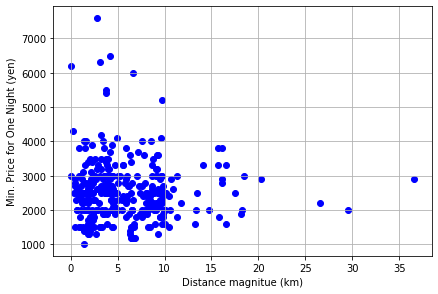

In [67]:
# Method 2 - using plt.scatter()
plt.scatter(price_reduced['Distance magnitue (km)'],
            price_reduced['Min. Price for One Night (yen)'],color='blue')
plt.tight_layout()
# plt.legend()
plt.grid()
plt.xlabel('Distance magnitue (km)')
plt.ylabel('Min. Price for One Night (yen)')
plt.show()

In [68]:
# Q9) Find the mean and standard deviation (STD) for minimum price column city wise

price_mean = price_reduced.groupby(["City"])["Min. Price for One Night (yen)"].mean()
price_std = price_reduced.groupby(["City"])["Min. Price for One Night (yen)"].std()
print(f'Mean for Minimum price column is {price_mean}')
print(f'Standard Deviation for Minimum price column is {price_std}')

Mean for Minimum price column is City
Fukuoka-City    2736.842105
Hiroshima       2578.571429
Kyoto           2293.589744
Osaka           2391.262136
Tokyo           2769.841270
Name: Min. Price for One Night (yen), dtype: float64
Standard Deviation for Minimum price column is City
Fukuoka-City     538.733624
Hiroshima        428.195806
Kyoto            718.103517
Osaka            745.457722
Tokyo           1043.246459
Name: Min. Price for One Night (yen), dtype: float64


In [69]:
# Q10) Create new dataframe for mean values
mean_df = pd.DataFrame({"City":price_mean.index, "Price Mean (yen)":price_mean.values})
# mean_df = mean_df.set_index("City")
mean_df

,City,Price Mean (yen)
0,Fukuoka-City,2736.842105
1,Hiroshima,2578.571429
2,Kyoto,2293.589744
3,Osaka,2391.262136
4,Tokyo,2769.841270


In [64]:
# mean_df = mean_df.set_index("City")
# mean_df

In [70]:
mean_df.columns

Index(['City', 'Price Mean (yen)'], dtype='object')

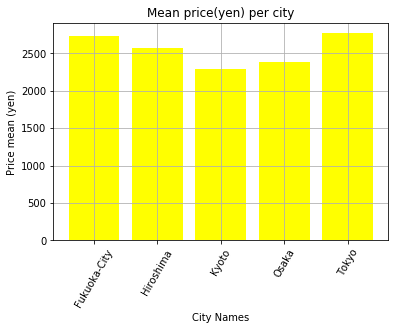

In [71]:
# Q11) Depict mean price vs city on a bar chart
plt.bar(mean_df['City'],mean_df['Price Mean (yen)'],color='yellow')
plt.title('Mean price(yen) per city')
plt.xlabel('City Names')
plt.ylabel('Price mean (yen)')
plt.grid()
plt.xticks(rotation=60)
plt.show()

[1000, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 5200, 5400, 5500, 6000, 6200, 6300, 6500, 7600]
[1, 5, 5, 3, 21, 9, 2, 13, 11, 39, 8, 15, 18, 10, 45, 14, 14, 12, 13, 23, 2, 6, 10, 4, 6, 4, 2, 6, 2, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


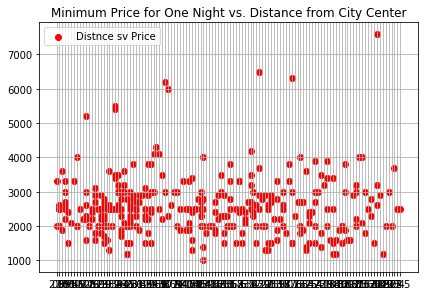

In [44]:
# Depict Price vs Distance on a scatter plot
# Method 1
l3 = list(df5.index)
l4 = list(df5.values)
print(l3)
print(l4)

# plt.scatter(l3,l4,label ="Price vs Distance")
# plt.legend()
# plt.xlabel('Price')
# plt.show()

plt.scatter(price_reduced['Distance magnitue (km)'],
            price_reduced['Min. Price for One Night (yen)'],
            label='Distnce sv Price',color='red')
plt.tight_layout()
plt.legend()
plt.title("Minimum Price for One Night vs. Distance from City Center")
plt.grid()
# plt.savefig("../reports/figures/distance_scatter.png")
plt.show()

# price_reduced.plot.scatter("Distance from City Center (km)", "Min. Price for One Night (yen)", alpha=0.6)
# plt.tight_layout()
# plt.title("Minimum Price for One Night vs. Distance from City Center")
# plt.grid()
# plt.savefig("../reports/figures/distance_scatter.png")
# plt.show()

In [72]:
#Q6) Find type of Rating per city
df3 = df.groupby(['City','Rating'])['Rating'].count()
print(type(df3))
df3

<class 'pandas.core.series.Series'>


City          Rating   
Fukuoka-City  Fabulous      8
              Superb       11
Hiroshima     Fabulous      3
              Superb       11
Kyoto         Fabulous     22
              Good          2
              Rating        2
              Superb       50
              Very Good     2
Osaka         Fabulous     35
              Good          7
              Rating        3
              Superb       53
              Very Good     6
Tokyo         Fabulous     39
              Good          2
              Rating        3
              Superb       71
              Very Good    12
Name: Rating, dtype: int64

In [77]:
df4 = df3.unstack()
df4

Rating,Fabulous,Good,Rating,Superb,Very Good
City,,,,,
Fukuoka-City,8.0,NaN,NaN,11.0,NaN
Hiroshima,3.0,NaN,NaN,11.0,NaN
Kyoto,22.0,2.0,2.0,50.0,2.0
Osaka,35.0,7.0,3.0,53.0,6.0
Tokyo,39.0,2.0,3.0,71.0,12.0


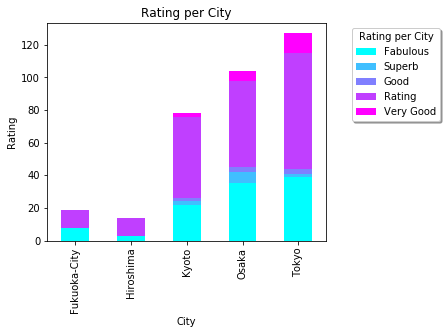

In [76]:
# Method 1
df3.unstack().plot(kind='bar', stacked=True, figsize=[5,4],colormap="cool")
plt.xlabel("City")
plt.ylabel("Rating")
plt.title("Rating per City")
plt.legend(title='Rating per City',loc='upper center', 
           bbox_to_anchor=(1.25, 1), shadow=True, ncol=1, 
           labels=['Fabulous','Superb', 'Good','Rating','Very Good'])

In [86]:
# Method 2
print(df4.index)
print(df4.values)
print(df4.iloc[0])
# plt.plot(df4.index, df4.values)

Index(['Fukuoka-City', 'Hiroshima', 'Kyoto', 'Osaka', 'Tokyo'], dtype='object', name='City')
[[ 8. nan nan 11. nan]
 [ 3. nan nan 11. nan]
 [22.  2.  2. 50.  2.]
 [35.  7.  3. 53.  6.]
 [39.  2.  3. 71. 12.]]
Rating
Fabulous      8.0
Good          NaN
Rating        NaN
Superb       11.0
Very Good     NaN
Name: Fukuoka-City, dtype: float64


In [ ]:
df3.unstack().plot(kind='bar', stacked=True, figsize=[5,4],colormap="cool")
plt.xlabel("City")
plt.ylabel("Rating")
plt.title("Rating per City")
plt.legend(title='Rating per City',loc='upper center', 
           bbox_to_anchor=(1.25, 1), shadow=True, ncol=1, 
           labels=['Fabulous','Superb', 'Good','Rating','Very Good'])

In [114]:
l1 = list(df.groupby(['City','Rating'])['Rating'].count().index)
l2 = list(df.groupby(['City','Rating'])['Rating'].count().values)
print(l1)
print(l2)

[('Fukuoka-City', 'Fabulous'), ('Fukuoka-City', 'Superb'), ('Hiroshima', 'Fabulous'), ('Hiroshima', 'Superb'), ('Kyoto', 'Fabulous'), ('Kyoto', 'Good'), ('Kyoto', 'Rating'), ('Kyoto', 'Superb'), ('Kyoto', 'Very Good'), ('Osaka', 'Fabulous'), ('Osaka', 'Good'), ('Osaka', 'Rating'), ('Osaka', 'Superb'), ('Osaka', 'Very Good'), ('Tokyo', 'Fabulous'), ('Tokyo', 'Good'), ('Tokyo', 'Rating'), ('Tokyo', 'Superb'), ('Tokyo', 'Very Good')]
[8, 11, 3, 11, 22, 2, 2, 50, 2, 35, 7, 3, 53, 6, 39, 2, 3, 71, 12]


In [118]:
#Q2) Get hostel count for each city
city_group = df.groupby("City").count()
print(type(city_group))
city_group

<class 'pandas.core.frame.DataFrame'>


,Hostel Name,Min. Price for One Night (yen),Distance from City Center,Summary Score,Rating,Atmosphere,Cleaniness,Facilities,Location,Security,Staff,Value for Money,Longitude,Latitude
City,,,,,,,,,,,,,,
Fukuoka-City,19,19,19,19,19,19,19,19,19,19,19,19,19,19
Hiroshima,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Kyoto,78,78,78,78,78,78,78,78,78,78,78,78,78,78
Osaka,104,104,104,104,104,104,104,104,104,104,104,104,104,104
Tokyo,127,127,127,127,127,127,127,127,127,127,127,127,127,127
